# <center> Unsupervised Learning Methods </center>
## <center> Problem Set IV </center>
### <center> t-SNE and (Geometric) Domain Adaptation </center>
This notebook contains the **t-SNE** part.  
See the second notebook for the **domain adaptation** part.

In [3]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

# 1. t-SNE
### 1.8.1 Perplexity - setting the variances
Implement the function `ComputeSTD`.
* Given:  
    * The point $\boldsymbol{x}_{i}\in\mathbb{R}^{D}$.
    * $\mathcal{N}_{i}$, the $K$th nearest neighbors of $\boldsymbol{x}_i$ (exclusive $\boldsymbol{x}_i$).
    * `PP` The perplexity value.
* The function computes $\sigma_{i}\pm\epsilon$, such that:
$$2^{H\left(\boldsymbol{x}_{i}\right)}=PP$$
where:
    $$H\left(\boldsymbol{x}_{i}\right)=-\sum_{j=1}^{K}p_{j|i}\log\left(p_{j|i}\right)$$
    
**Tip:** Since $2^{H\left(\boldsymbol{x}_{i}\right)}$ is monotonic increasing with $\sigma_{i}$, use binary search.

#### Options (choose one):
* **Option I  (slow, simple(r), no bonus):**   Implement the function for a single data point $\boldsymbol{x}_{i}\in\mathbb{R}^{D}$.
* **Option II (fast, hard(er), 5% bonus):** Implement the (vectorized) function for the entire dataset $\boldsymbol{X}\in\mathbb{R}^{D\times N}$.  
In both options, you must use a **single** (binary search) loop.

In [192]:
from scipy.stats import multivariate_normal
from scipy.stats import entropy

#-- Option I:
def ComputeSTD1(vXi, mN, PP, ε=1e-2):
    '''
    ===============================================================================
    Compute the std σ
    Args:
        vXi - The point x_i,                   vXi.shape = (D,)
        mN  - K'th nearst neighbors,           mN .shape = (D, K)
        PP  - Perplexity value,                PP > 0
        ε   - threshold for the binary search, ε  > 0
    Output:
        σ   - The std
    ===============================================================================
    ''' 
    
    '''
    ==============================================
    Write your code below.
    It should be 10-15 lines of code
    ==============================================
    '''
    
    candidate_PP = PP - 10
    found = False
    
    search_array = np.linspace(0.0001, 1, num = 100000)
    start = 0
    end = len(search_array) - 1
    
    while not found:
        mid = start + (end - start) // 2
        sigma = search_array[mid]
        
        temp = np.exp(-(np.linalg.norm(np.subtract(np.reshape(vXi, (2,1)), mN), axis =0)**2) /(2* sigma**2))
        C_i = np.sum(temp)
        probabilities_array = temp / C_i
        candidate_PP = 2 ** entropy(probabilities_array, base=2)
        if abs(candidate_PP - PP) < ε or start >= end-1:
            found = True
#             print('diff: ',  abs(candidate_PP - PP))
        elif candidate_PP < PP:
            start = mid + 1
        else:
            end = mid - 1
        
        sigma = search_array[int((end - start) /2)]
        
    return sigma

In [6]:
from scipy.stats import norm

#-- Option II:
def ComputeSTD2(mX, mD, PP, ε=1e-2):
    '''
    ===============================================================================
    Compute the std σ (for each data-point)
    Args:
        mX - The input dataset,                                          mX.shape = (D, N)
        mD - The distance from each point to its K'th nearset neighbors, mD.shape = (N, K)
        PP - Perplexity value,                                           PP > 0
        ε  - threshold for the binary search,                            ε  > 0
    Output:
        vσ - The std,                                                    vσ.shape = (N,)                              
    ===============================================================================
    ''' 
    
    '''
    ==============================================
    Write your code below.
    It should be 10-15 lines of code
    ==============================================
    '''
    pass
    
    return vσ

#### Test your implementation:

In [193]:
from sklearn.neighbors import kneighbors_graph, NearestNeighbors

#-- Some random data:
mX       = np.random.randn(2, 1000)
oNN      = NearestNeighbors(n_neighbors=50).fit(mX.T)
mD, mIdx = oNN.kneighbors(mX.T, return_distance=True)
mN       = mX[:,mIdx[:,1:]]

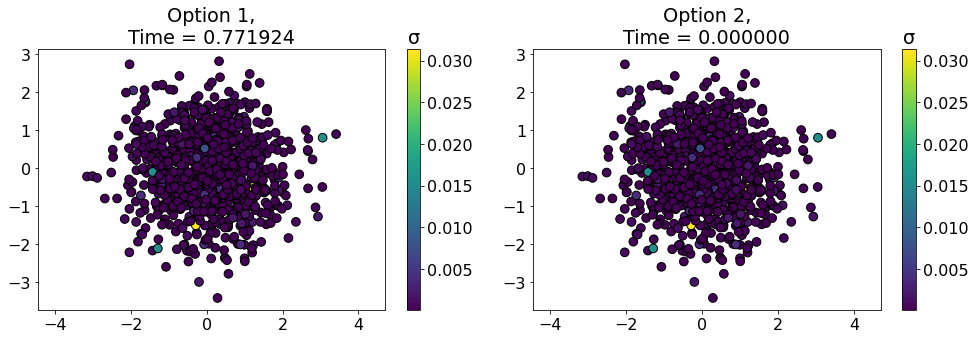

In [194]:
import time

D, N = mX.shape
PP   = 30

Op1 = lambda: [ComputeSTD1(mX[:,ii], mN[:,ii,1:], PP) for ii in range(N)] #-- option I
vσ = Op1()
Op2 = lambda: ComputeSTD2(mX, mD, PP)                                     #-- option II

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
for ii, ax in enumerate(fig.axes):
    
    start = time.time()
    vσ    = Op1() if ii == 0 else Op2()
    end   = time.time()
    
    h = ax.scatter(*mX, s=75, c=vσ, edgecolor='k')
    ax.axis       ('equal')
    ax.set_title  (f'Option {ii+1},\nTime = {end - start:3.6f}')
    plt.colorbar  (h, ax=ax).ax.set_title('σ')

plt.tight_layout()
plt.show()

In [195]:
Op1()

[0.00032997929979299793,
 0.00014999549995499954,
 0.002039825398253982,
 0.00032997929979299793,
 0.000209990099900999,
 0.00014999549995499954,
 0.0005699576995769958,
 0.0010599135991359913,
 0.00014999549995499954,
 0.0005699576995769958,
 0.00011999819998199983,
 0.00014999549995499954,
 0.00032997929979299793,
 0.00032997929979299793,
 0.000209990099900999,
 0.00032997929979299793,
 0.00014999549995499954,
 0.00032997929979299793,
 0.01570859508595086,
 0.000209990099900999,
 0.0005799567995679956,
 0.00032997929979299793,
 0.00032997929979299793,
 0.00032997929979299793,
 0.0005799567995679956,
 0.0010599135991359913,
 0.003989649896498965,
 0.00014999549995499954,
 0.0005699576995769958,
 0.000209990099900999,
 0.00014999549995499954,
 0.000209990099900999,
 0.000209990099900999,
 0.0005699576995769958,
 0.00032997929979299793,
 0.000209990099900999,
 0.0005799567995679956,
 0.000209990099900999,
 0.00014999549995499954,
 0.000209990099900999,
 0.0005699576995769958,
 0.0020398

### 1.8.2 Implement `TSNE`
Implement the following `TSNE` class:
* `FitTransform` - Given $\boldsymbol{X}\in\mathbb{R}^{D\times N}$, obtains a low-dimensional representation.

**Notes:**
* Use must use a **single** loop.
* Use gradient descent with momentum.
* You may use the dynamic plot part for a nice visual animation of the algorithm:
    * Only works on `Jupyter`
    * Use `%matplotlib notebook` (instead of `%matplotlib inline`)
    * If you do not this, plot the final result with a `scatter` plot.
* **3% Bonus: Optimization tricks**
    * *Early compression:* In the first (50) iterations, add the penalty $\lambda\left\Vert \boldsymbol{Z}\right\Vert _{F}^{2}$ to the objective.  
    (Update your gradient accordingly)
    
    * *Early exaggeration:* In the first (50) iterations, use $4\boldsymbol{P}$ instead of $\boldsymbol{P}$.
    * After (about 100-200) iterations, update the momentum to $\beta=0.8$.
    


In [189]:
from scipy.spatial.distance import cdist
from sklearn.neighbors      import kneighbors_graph, NearestNeighbors

class TSNE:
    def __init__(self, d=2, K=50, PP=20, numIter=300, µ=100, ß=0.5, λ=1e-4):
        '''
        ========================================================================
        Set the hyper-parameters
        Args:
            d       - The output dimensionality.
            K       - Number of neareast neighbors.
            PP      - The perpelxity value.
            numIter - Number of iterations.
            µ       - Step size.
            ß       - Momentum decaying factor
            λ       - L² regularization factor (Early compression).
        ========================================================================
        '''
        self.d       = d
        self.K       = K
        self.PP      = PP
        self.numIter = numIter
        self.µ       = µ
        self.ß       = ß
        self.λ       = λ
  
    def FitTransform(self, mX, vY=None):
        '''
        ========================================================================
        Applies the t-SNE algorithm
        Args:
            mX   - Input data,                                  mX.shape = (D, N)
            [vY] - Input labels, optional for dynamic plot,     vY.shape = (N,)
        Output:
            mZ   - Low-dimensional representation (embeddings), mZ.shape = (d, N)
        ========================================================================
        '''
        d       = self.d
        K       = self.K
        PP      = self.PP
        numIter = self.numIter
        µ       = self.µ
        ß       = self.ß
        λ       = self.λ
        
        D, N    = mX.shape

        #-- Compute σ:
        oNN      = NearestNeighbors(n_neighbors=self.K).fit(mX)
        mD, mIdx = oNN.kneighbors(mX, return_distance=True)
        mN       = mX[:,mIdx[:,1:]]
        Op1 = lambda: [ComputeSTD1(mX[:,ii], mN[:,ii,1:], PP) for ii in range(N)] #-- option I
        vσ = Op1()
            
        #-- Compute P:
        ???
        
        #-- Initialaization:
        ???

        #-- Dynamic plot:
        color   = 'b' if vY is None else vY
        fig, ax = plt.subplots(figsize=(6, 5))
        ax.axis('equal')
        ax.set_xlabel('$z_1$')
        ax.set_ylabel('$z_2$')
        s   = ax.scatter(*mZ)
        cax = None
        
        for ii in range(numIter):
            #-- Compute Q:
            ???
            
            #-- Compute gradient:
            ???
            
            #-- GD + momentum update:
            ???
            
            #-- Dynamic plot:
            s.remove          ()
            s = ax.scatter    (*mZ, s=25, c=color, edgecolor='k', cmap='tab10', vmin=-1/2, vmax=len(np.unique(color))-1/2)
            ax.set_title      (f'{ii}')
            cax = plt.colorbar(s, ax=ax, cax=cax).ax.axes
            fig.canvas.draw   ()
            plt.pause         (1e-6)
            
        return mZ


#### Test your implementation:

In [200]:
from sklearn.datasets import load_digits

mX, vY = load_digits(return_X_y=True)
mX.shape, vY.shape

((1797, 64), (1797,))

In [202]:
%matplotlib notebook

# mZ = TSNE(µ=25, K=50, PP=30).FitTransform(mX.T, vY)

oNN      = NearestNeighbors(n_neighbors=50).fit(mX)
mD, mIdx = oNN.kneighbors(mX, return_distance=True)
mN       = mX[:,mIdx[:,1:]]
mD

IndexError: index 877 is out of bounds for axis 1 with size 64

**Optional:**
* Test your code on `MNIST` as well.
* Use about $1,000 \leq N \leq 4,000$ data-points.

In [9]:
from sklearn.datasets import fetch_openml

mX, vY = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
N      = 3000
mX     = mX[:N]
vY     = vY[:N].astype(np.float32)

???

Object `?` not found.
